In [12]:
from sklearn import datasets, model_selection, linear_model, metrics, preprocessing,  neighbors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris_df=datasets.load_iris()

In [4]:
X=iris_df.data
y=iris_df.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [6]:
iris_df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = model_selection.train_test_split(X, y,
                                                                                   random_state=7, train_size = 0.8)


In [10]:
lr_iris=linear_model.LogisticRegression()
lr_iris.fit(X_train_iris, y_train_iris)
y_pred_iris=lr_iris.predict(X_test_iris)

conf_mat_iris= metrics.confusion_matrix(y_test_iris, y_pred_iris)
conf_mat_df=pd.DataFrame(conf_mat_iris, index=iris_df.target_names, columns=iris_df.target_names )
conf_mat_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,setosa,versicolor,virginica
setosa,7,0,0
versicolor,0,10,2
virginica,0,2,9


In [11]:
print(metrics.classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



Text(0, 0.5, 'Inertia')

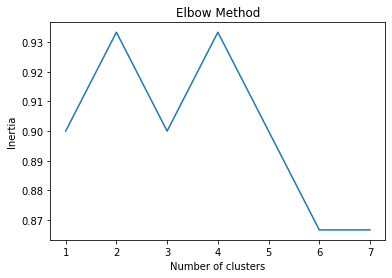

In [16]:
elbow=dict()
for i in range(1,8):
    knn_iris= neighbors.KNeighborsClassifier(n_neighbors=i)  
    knn_iris.fit(X_train_iris, y_train_iris)
    y_pred_knn=knn_iris.predict(X_test_iris)  
    elbow[i]=metrics.accuracy_score(y_test_iris, y_pred_knn)
    
elbow_df=pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')


In [18]:
knn_iris= neighbors.KNeighborsClassifier(n_neighbors=4)  
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_knn=knn_iris.predict(X_test_iris)  

conf_mat_knn= metrics.confusion_matrix(y_test_iris, y_pred_knn)
conf_mat_knn=pd.DataFrame(conf_mat_knn, index=iris_df.target_names, columns=iris_df.target_names )
conf_mat_knn


,setosa,versicolor,virginica
setosa,7,0,0
versicolor,0,12,0
virginica,0,2,9


In [19]:
print(metrics.classification_report(y_test_iris, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      1.00      0.92        12
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

